## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
#from keras.utils import np_utils

from keras import optimizers
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


## Reading the Dataset

In [0]:
path='drive/My Drive/Datasets/'
seismic_df = pd.read_csv(path+'dataset.txt')

In [3]:
seismic_df.head()

,seismic,seismoacoustic,shift,genergy,gpul,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


In [4]:
#checking for data shape and data type information
seismic_df.shape
seismic_df.info()

#checking for Missing Values
seismic_df.isnull().sum()

#description of the dataset
seismic_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   seismic         2584 non-null   object
 1   seismoacoustic  2584 non-null   object
 2   shift           2584 non-null   object
 3   genergy         2584 non-null   int64 
 4   gpul            2584 non-null   int64 
 5   gdenergy        2584 non-null   int64 
 6   gdpuls          2584 non-null   int64 
 7   ghazard         2584 non-null   object
 8   nbumps          2584 non-null   int64 
 9   nbumps2         2584 non-null   int64 
 10  nbumps3         2584 non-null   int64 
 11  nbumps4         2584 non-null   int64 
 12  nbumps5         2584 non-null   int64 
 13  nbumps6         2584 non-null   int64 
 14  nbumps7         2584 non-null   int64 
 15  nbumps89        2584 non-null   int64 
 16  energy          2584 non-null   int64 
 17  maxenergy       2584 non-null   int64 
 18  class   

,genergy,gpul,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
count,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.0,2584.0,2584.0,2584.000000,2584.000000,2584.000000
mean,9.024252e+04,538.579334,12.375774,4.508901,0.859520,0.393576,0.392802,0.067724,0.004644,0.0,0.0,0.0,4975.270898,4278.850619,0.065789
std,2.292005e+05,562.652536,80.319051,63.166556,1.364616,0.783772,0.769710,0.279059,0.068001,0.0,0.0,0.0,20450.833222,19357.454882,0.247962
min,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,5.283250e+04,669.000000,38.000000,30.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,2600.000000,2000.000000,0.000000
max,2.595650e+06,4518.000000,1245.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,0.0,0.0,0.0,402000.000000,400000.000000,1.000000


In [5]:
seismic_df['class'].value_counts(normalize=True)

0    0.934211
1    0.065789
Name: class, dtype: float64

## Converting Non-Numeric values to Numeric Values to apply algorithms

In [0]:
def handle_non_numerical_data(df):
    columns = df.columns

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

seismic_df=handle_non_numerical_data(seismic_df)

## Checking the Correlation

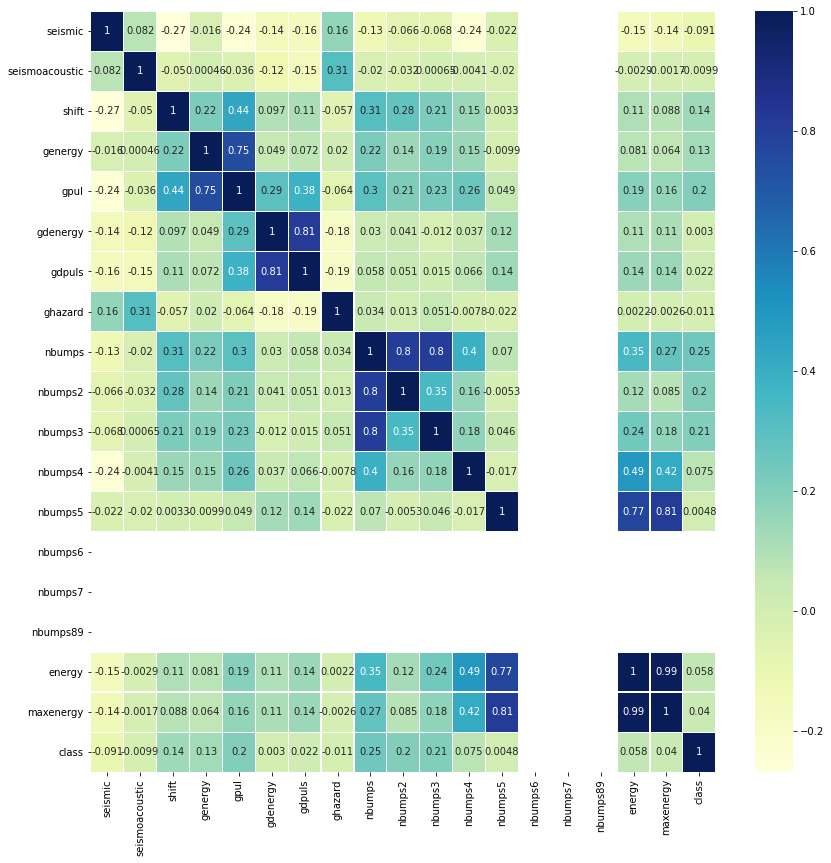

In [7]:
plt.figure(figsize=(14,14))
corr_mat=seismic_df.corr()
sns.heatmap(corr_mat,cmap='YlGnBu',annot=True,linewidths=0.2)
plt.show()

In [8]:
seismic_df.columns

Index(['seismic', 'seismoacoustic', 'shift', 'genergy', 'gpul', 'gdenergy',
       'gdpuls', 'ghazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4',
       'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89', 'energy', 'maxenergy',
       'class'],
      dtype='object')

## Removing Unnecessary columns

In [9]:
drop_col=['nbumps6','nbumps7','nbumps89']
seismic_df.drop(columns=drop_col,inplace=True)
seismic_df.columns

Index(['seismic', 'seismoacoustic', 'shift', 'genergy', 'gpul', 'gdenergy',
       'gdpuls', 'ghazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4',
       'nbumps5', 'energy', 'maxenergy', 'class'],
      dtype='object')

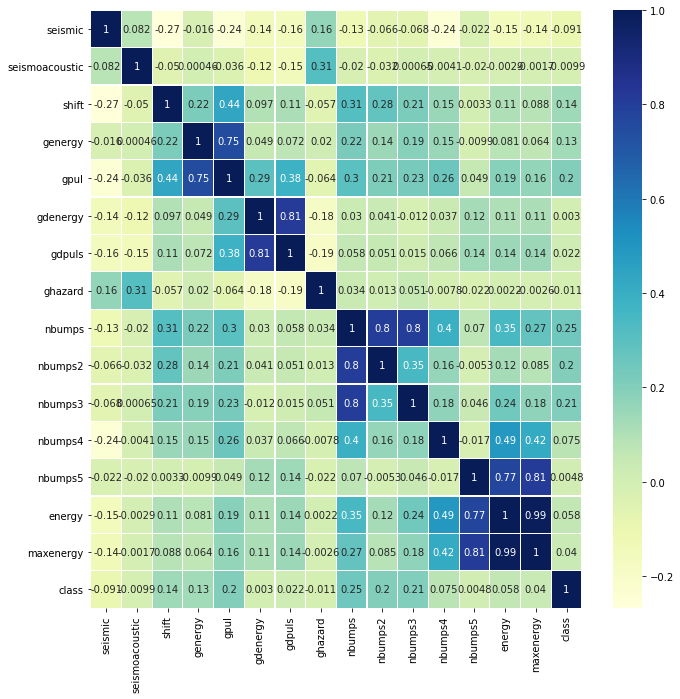

In [11]:
plt.figure(figsize=(11,11))
corr_mat=seismic_df.corr()
sns.heatmap(corr_mat,cmap='YlGnBu',annot=True,linewidths=0.2)
plt.show()

In [0]:
label_encoder = LabelEncoder()
seismic_integer_encoded = label_encoder.fit_transform(seismic_df['seismic'])
seismic_df['seismic'] = seismic_integer_encoded

seismoacoustic_integer_encoded = label_encoder.fit_transform(seismic_df['seismoacoustic'])
seismic_df['seismoacoustic'] = seismoacoustic_integer_encoded

ghazard_integer_encoded = label_encoder.fit_transform(seismic_df['ghazard'])
seismic_df['ghazard'] = ghazard_integer_encoded
seismic_df = seismic_df.drop(['shift'],axis =1)

In [13]:
seismic_df.head()

,seismic,seismoacoustic,shift,genergy,gpul,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
0,1,1,0,15180,48,-72,-72,1,0,0,0,0,0,0,0,0
1,1,1,0,14720,33,-70,-79,1,1,0,1,0,0,2000,2000,0
2,1,1,0,8050,30,-81,-78,1,0,0,0,0,0,0,0,0
3,1,1,0,28820,171,-23,40,1,1,0,1,0,0,3000,3000,0
4,1,1,0,12640,57,-63,-52,1,0,0,0,0,0,0,0,0


## Splitting the data for training and testing purpose

In [16]:
X = seismic_df.values[:,0:16]
y = seismic_df.values[:,-1]

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

(2584, 16)
(2584,)


## Gaussian Naive Bayes Algorithm


 mean Accuracy:  
0.9046831762112472

 Standard Deviation:
0.017362429663327655

 Confusion Matrix : 
[[454  32]
 [ 25   6]]


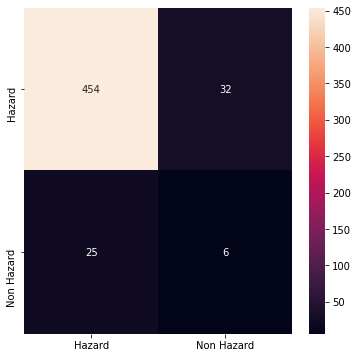


 AUC ROC score  0.5638523828487987


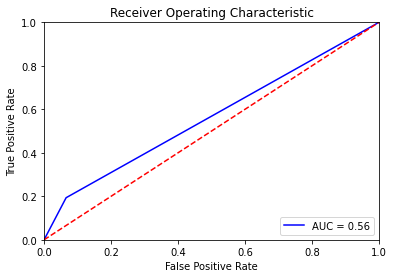

In [18]:
from sklearn.naive_bayes import GaussianNB
classifier1 = GaussianNB()

trained_model = classifier1.fit(X_train, y_train)
y_pred = trained_model.predict(X_test)


#Finding accuracy using 10 fold cross-validation

accuracies = cross_val_score(estimator = classifier1, X = X_train, y = y_train, cv = 10)
mn=accuracies.mean()
sd=accuracies.std()

print ("\n mean Accuracy:  ")
print (mn)
print ("\n Standard Deviation:")
print (sd)

print ("\n Confusion Matrix : ")
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt="0000.0f",xticklabels=["Hazard","Non Hazard"],yticklabels=["Hazard","Non Hazard"])
plt.show()

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_pred)
print ("\n AUC ROC score ",roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## K-Nearest Neighbours Algorithm


 mean Accuracy: 
0.9250105529759394

 Standard Deviation:
0.00623050116225987

 Confusion Matrix : 
[[483   3]
 [ 29   2]]


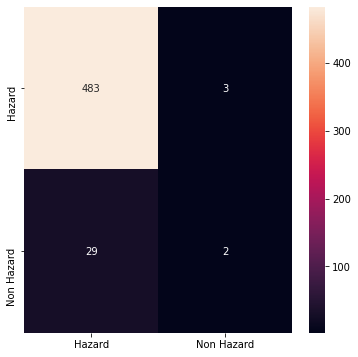

AUC ROC
0.5291716447630426


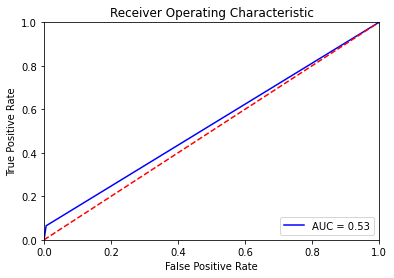

In [21]:
#%%

from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
trained_model = classifier2.fit(X_train, y_train)
y_pred = trained_model.predict(X_test)


accuracies = cross_val_score(estimator = classifier2, X = X_train, y = y_train, cv = 10)
mn=accuracies.mean()
sd=accuracies.std()

print ("\n mean Accuracy: ")
print (mn)

print ("\n Standard Deviation:")
print (sd)

print ("\n Confusion Matrix : ")
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt="0000.0f",xticklabels=["Hazard","Non Hazard"],yticklabels=["Hazard","Non Hazard"])
plt.show()

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_pred)
print("AUC ROC")
print(roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Logistic Regression

 
 Logistic Regression :-  

 mean Accuracy: 
0.9187139439988744

 Standard Deviation:
0.015466347834405257

 Confusion Matrix : 
[[483   3]
 [ 30   1]]


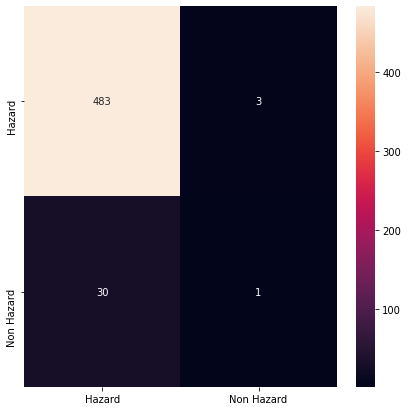

0.5130426125049781


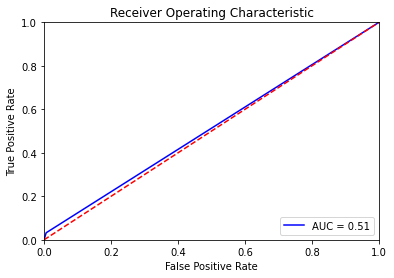

In [22]:
#%%


from sklearn.linear_model import LogisticRegression   #class
classifier3  = LogisticRegression(random_state = 101,max_iter=2000)

trained_model = classifier3.fit(X_train, y_train)
y_pred = trained_model.predict(X_test)

accuracies = cross_val_score(estimator = classifier3, X = X_train, y = y_train, cv = 10)
mn=accuracies.mean()
sd=accuracies.std()

print (" \n Logistic Regression :-  ") 
print ("\n mean Accuracy: ")
print (mn)

print ("\n Standard Deviation:")
print (sd)

print ("\n Confusion Matrix : ")
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True,fmt="0000.0f",xticklabels=["Hazard","Non Hazard"],yticklabels=["Hazard","Non Hazard"])
plt.show()

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_pred)
print (roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Decision Tree Classifier


 Decision Tree :-  

 mean Accuracy: 
1.0

 Standard Deviation:
0.0

 Confusion Matrix : 
[[486   0]
 [  0  31]]


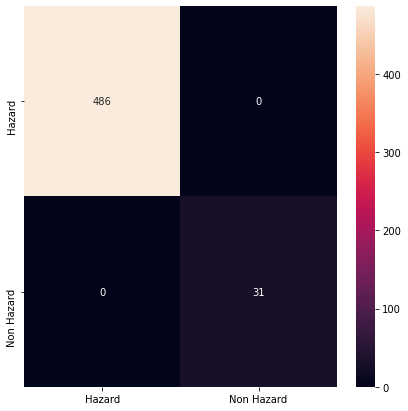

1.0


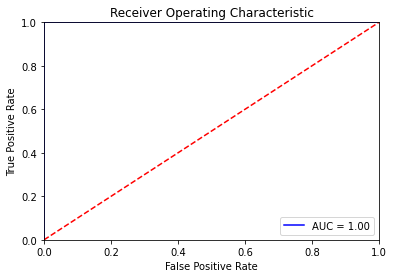

In [23]:
#%%
from sklearn.tree import DecisionTreeClassifier
classifier4 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
trained_model = classifier4.fit(X_train, y_train)
y_pred = trained_model.predict(X_test)

accuracies = cross_val_score(estimator = classifier4, X = X_train, y = y_train, cv = 10)
mn=accuracies.mean()
sd=accuracies.std()

print ("\n Decision Tree :-  ") 
print ("\n mean Accuracy: ")
print (mn)

print ("\n Standard Deviation:")
print (sd)

print ("\n Confusion Matrix : ")
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True,fmt="0000.0f",xticklabels=["Hazard","Non Hazard"],yticklabels=["Hazard","Non Hazard"])
plt.show()

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_pred)
print (roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Support Vector Machine Classifier

 
 Support Vector machines :-  

 mean Accuracy: 
0.9327540922095586

 Standard Deviation:
0.0013857670281515956

 Confusion Matrix : 
[[486   0]
 [ 31   0]]


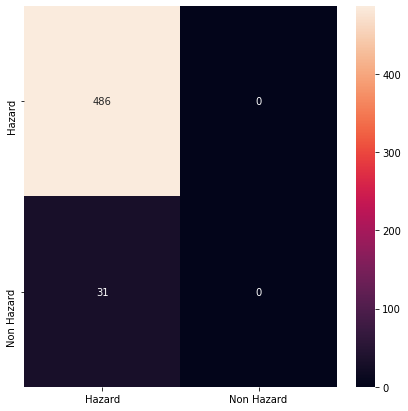


AUC ROC  0.5


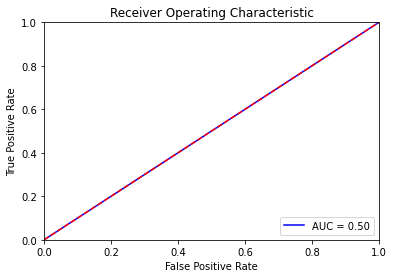

In [24]:
#%%


from sklearn.svm import SVC
classifier5 = SVC()
trained_model = classifier5.fit(X_train, y_train)
y_pred = trained_model.predict(X_test)

accuracies = cross_val_score(estimator = classifier5, X = X_train, y = y_train, cv = 10)
mn=accuracies.mean()
sd=accuracies.std()

print (" \n Support Vector machines :-  ") 
print ("\n mean Accuracy: ")
print (mn)

print ("\n Standard Deviation:")
print (sd)

print ("\n Confusion Matrix : ")
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True,fmt="0000.0f",xticklabels=["Hazard","Non Hazard"],yticklabels=["Hazard","Non Hazard"])
plt.show()

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_pred)
print("\nAUC ROC ",roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Random Forest Classifier


 Random Forest : Randomly selected 10 features and 100 forest and then mean accuracy :-  

 mean Accuracy: 
0.9319674647022712

 Standard Deviation:
0.006576405939703404
[[714  12]
 [ 48   2]]


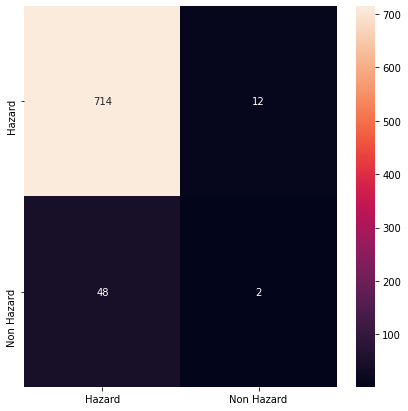

0.5117355371900827


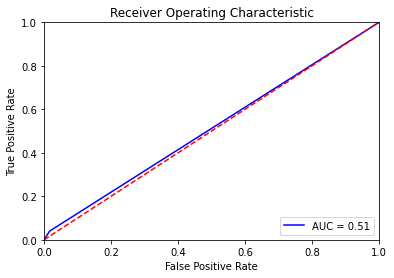

In [0]:
#%%
from sklearn.ensemble import RandomForestClassifier

seed = 7
num_trees = 150
max_features = 10

classifier6 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
trained_model = classifier6.fit(X_train, y_train)
y_pred = trained_model.predict(X_test)



accuracies = cross_val_score(estimator = classifier6, X = X_train, y = y_train, cv = 10)
mn=accuracies.mean()
sd=accuracies.std()

print ("\n Random Forest : Randomly selected 10 features and 100 forest and then mean accuracy :-  ") 
print ("\n mean Accuracy: ")
print (mn)

print ("\n Standard Deviation:")
print (sd)

cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True,fmt="0000.0f",xticklabels=["Hazard","Non Hazard"],yticklabels=["Hazard","Non Hazard"])
plt.show()

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_pred)
print (roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## ADA Boost Clasifier

 
 Boosting using Adaboost : Randomly selected 50 tress and then mean accuracy :-  

 mean Accuracy: 
1.0

 Standard Deviation:
0.0
[[486   0]
 [ 31   0]]


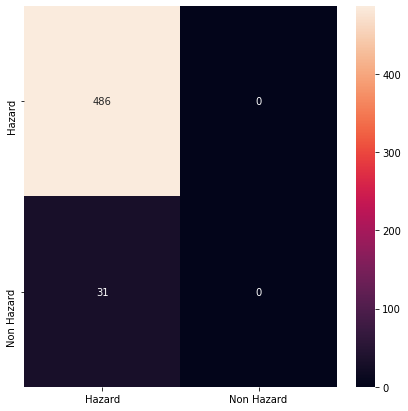

0.5


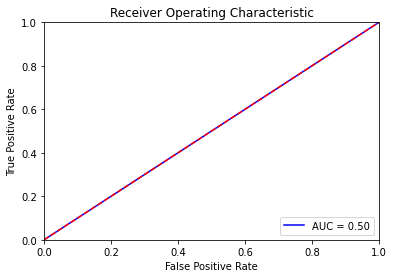

In [26]:
#%%
from sklearn.ensemble import AdaBoostClassifier

seed = 7
num_trees = 50
classifier7 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
accuracies = cross_val_score(estimator = classifier7, X = X_train, y = y_train, cv = 10)
# demonstrates the construction of 50 decision trees in sequence using the AdaBoost algorithm.
mn=accuracies.mean()
sd=accuracies.std()
y_pred=classifier7
print (" \n Boosting using Adaboost : Randomly selected 50 tress and then mean accuracy :-  " )
print ("\n mean Accuracy: ")
print (mn)

print ("\n Standard Deviation:")
print (sd)

cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True,fmt="0000.0f",xticklabels=["Hazard","Non Hazard"],yticklabels=["Hazard","Non Hazard"])
plt.show()

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_pred)
print (roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



## Deep Learning Algorithm (Artificial Neural Network Classifier)

In [28]:
model = Sequential()
model.add(Dense(17, input_dim=16, kernel_initializer='normal', activation='relu'))
model.add(Dense(9, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
sgd =optimizers.SGD(lr=0.01, momentum=0.8, decay=0.0, nesterov=False)
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

#We manually provide the train and test partition
history = model.fit(X_train, y_train, validation_split=0.33, epochs=1000, batch_size=16, verbose=2)


Train on 1384 samples, validate on 683 samples
Epoch 1/1000
 - 0s - loss: 1.3660 - accuracy: 0.8685 - val_loss: 1.5600 - val_accuracy: 0.9209
Epoch 2/1000
 - 0s - loss: 1.7840 - accuracy: 0.8721 - val_loss: 3.6550 - val_accuracy: 0.9209
Epoch 3/1000
 - 0s - loss: 1.2232 - accuracy: 0.8902 - val_loss: 0.6376 - val_accuracy: 0.9195
Epoch 4/1000
 - 0s - loss: 0.8711 - accuracy: 0.8931 - val_loss: 0.7098 - val_accuracy: 0.9165
Epoch 5/1000
 - 0s - loss: 0.5898 - accuracy: 0.9147 - val_loss: 1.2704 - val_accuracy: 0.9209
Epoch 6/1000
 - 0s - loss: 0.6786 - accuracy: 0.9212 - val_loss: 0.6294 - val_accuracy: 0.9209
Epoch 7/1000
 - 0s - loss: 0.7528 - accuracy: 0.9111 - val_loss: 0.8650 - val_accuracy: 0.9122
Epoch 8/1000
 - 0s - loss: 0.5534 - accuracy: 0.9270 - val_loss: 0.5199 - val_accuracy: 0.8858
Epoch 9/1000
 - 0s - loss: 0.6211 - accuracy: 0.9155 - val_loss: 0.7757 - val_accuracy: 0.8287
Epoch 10/1000
 - 0s - loss: 0.5834 - accuracy: 0.9234 - val_loss: 2.8802 - val_accuracy: 0.9209
Ep

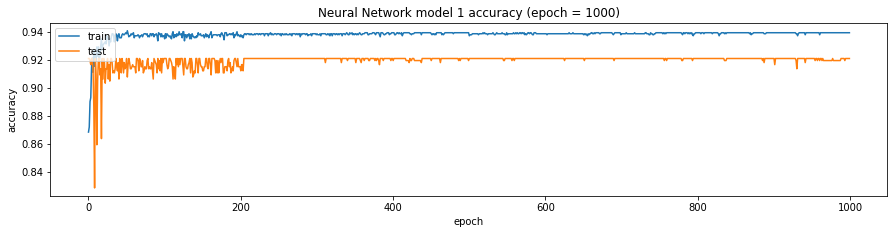

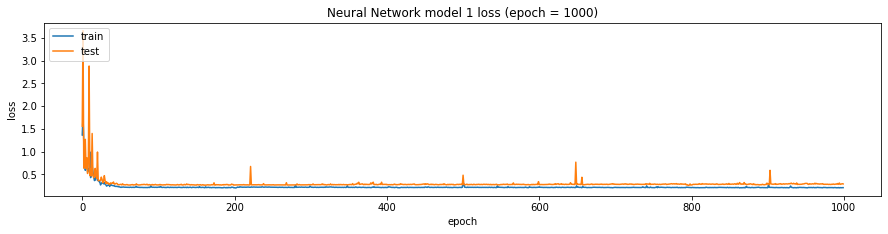

In [31]:
Y_test_set = seismic_df.values[:,-1]
#Y_test_set.reshape((-1,17))
ynew = model.predict_classes(X_test)

# summarize history for accuracy
plt.figure(figsize=(15,7))

plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Neural Network model 1 accuracy (epoch = 1000)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(15,7))

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Neural Network model 1 loss (epoch = 1000)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
print("Accuracy score: ",accuracy_score(y_test,ynew))

Accuracy score:  0.9400386847195358
